In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import math

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers.core import Dense, Activation, Dropout
import time #helper libraries


c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [27]:
df1 = pd.read_csv('well2.csv')  # bisa sorted or not]
#print(df1.head())

x = df1['GLIR'].values
y = df1['Qo'].values

x = x[69:]
y = y[69:]

In [28]:
dataset_glir = x.reshape(-1, 1)
dataset_qo = y.reshape(-1,1)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_glir = scaler.fit_transform(dataset_glir)
dataset_qo = scaler.fit_transform(dataset_qo)

In [29]:
size = 0.5
train_size = int(len(dataset_glir) * size)
test_size = len(dataset_glir) - train_size
train, test = dataset_glir[0:train_size,:], dataset_glir[train_size:len(dataset_glir),:]

train_size2 = int(len(dataset_qo) * size)
test_size2 = len(dataset_qo) - train_size2
train2, test2 = dataset_qo[0:train_size2,:], dataset_qo[train_size2:len(dataset_qo),:]

In [30]:
len(test2)

52

In [31]:
model = Sequential()
model.add(LSTM(10, return_sequences=True, input_shape=(1, 1)))
model.add(Dropout(0.2))
model.add(LSTM(10, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(10))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(train, train2, epochs=100, batch_size=30, verbose=1)

Epoch 1/100
2/2 [==============================] - 5s 9ms/step - loss: 0.5212
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 0.5149
Epoch 3/100
2/2 [==============================] - 0s 16ms/step - loss: 0.5091
Epoch 4/100
2/2 [==============================] - 0s 14ms/step - loss: 0.5028
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 0.4967
Epoch 6/100
2/2 [==============================] - 0s 12ms/step - loss: 0.4896
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 0.4841
Epoch 8/100
2/2 [==============================] - 0s 16ms/step - loss: 0.4773
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 0.4729
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 0.4661
Epoch 11/100
2/2 [==============================] - 0s 13ms/step - loss: 0.4597
Epoch 12/100
2/2 [==============================] - 0s 9ms/step - loss: 0.4535
Epoch 13/100
2/2 [==============================] - 0s 8

In [32]:
# make predictions
trainPredict = model.predict(train)
testPredict = model.predict(test)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(train2)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(test2)

2/2 [==============================] - 0s 0s/step


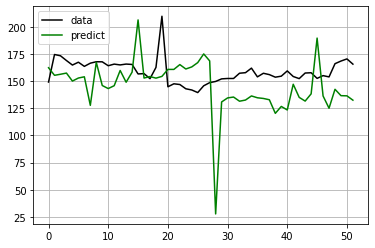

In [33]:
plt.figure()
plt.plot(range(0,len(trainY)),trainY,label = 'data',color = 'black')
plt.plot(range(0,len(testY)),testY,label = 'predict',color = 'green')
plt.legend()
plt.grid()